In [51]:
import glob
import cv2
import numpy as np


In [52]:
from keras.applications.mobilenetv2 import preprocess_input


In [53]:
import csv
import math

from PIL import Image
import numpy as np
from keras import Model
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape, Dense, GlobalAveragePooling2D
from keras.utils import Sequence
from keras.optimizers import Adam
from keras.backend import epsilon


In [54]:
# "model-0.52.h5"
WEIGHTS_FILE = "model-0.52.h5"
IMAGES = "./tb images/Anomaly/anomaly29.jpeg"
IMAGE_SIZE=96
ALPHA = 1.0
CLASSES=2

In [55]:
def create_model(trainable=False):
    model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)

    # to freeze layers
    for layer in model.layers:
        layer.trainable = trainable
    model.layers[-1].trainable=True
    out = model.layers[-1].output

    x = Conv2D(4, kernel_size=3)(out)
    x = Reshape((4,), name="coords")(x)

    y = GlobalAveragePooling2D()(out)
    y = Dense(CLASSES, name="classes", activation="sigmoid")(y)

    return Model(inputs=model.input, outputs=[x, y])

In [56]:
filename= glob.glob(IMAGES)
#filename="./test.jpg"
filename[0]

'./tb images/Anomaly/anomaly29.jpeg'

In [42]:
# model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)

#     # to freeze layers
# for layer in model.layers:
#     layer.trainable = False
# out

In [57]:
# model.layers[-1].output

In [58]:
model = create_model()
model.load_weights(WEIGHTS_FILE)


# for filename in glob.glob(IMAGES):
    
#         unscaled = cv2.imread(filename)
#         image_height, image_width, _ = unscaled.shape

#         image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
#         feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

#         region = model.predict(x=np.array([feat_scaled]))[0]

#         x0 = int(region[0] * image_width / IMAGE_SIZE)
#         y0 = int(region[1] * image_height / IMAGE_SIZE)

#         x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
#         y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

#         cv2.rectangle(unscaled, (x0, y0), (x1, y1), (0, 0, 255), 1)
#         cv2.imshow("image", unscaled)

#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
#         break


In [148]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 48, 48, 32)   0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

In [59]:
filename="./tb images/Anomaly/anomaly33.jpeg"

In [49]:

unscaled = cv2.imread(filename)
image_height, image_width, _ = unscaled.shape

image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region, class_id = model.predict(x=np.array([image]))
region = region[0]

x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1]  * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

class_id = np.argmax(class_id, axis=1)
# x0=x0+880
#y0=y0-250
#machine l       

[1]


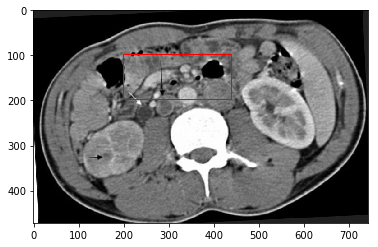

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1, y1,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
print(class_id)
plt.show()